In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown

data_1 = np.loadtxt('lab4_1.txt')
data_2 = np.loadtxt('lab4_2.txt')
data_3 = np.loadtxt('lab_5.txt')
data_4 = np.loadtxt('lab_6.txt')

# Lab_1

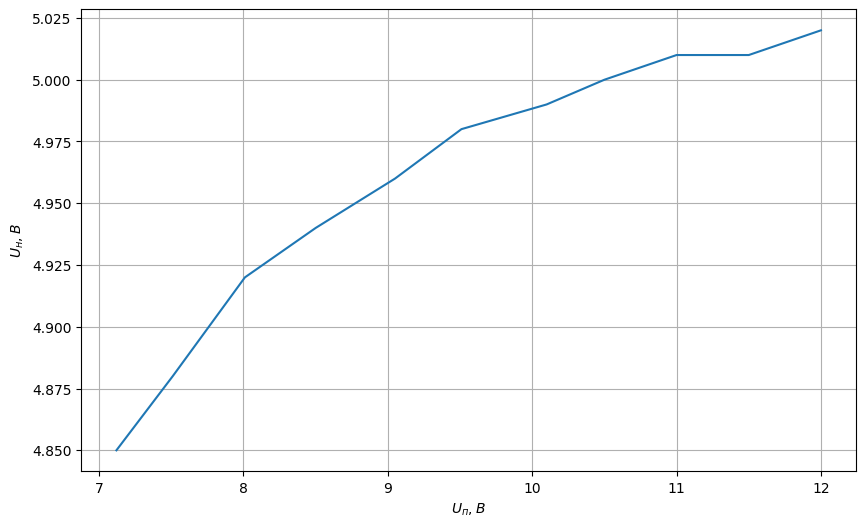

In [26]:
U_p, U_n, I_n = data_1[:, 0], data_1[:, 1], data_1[:, 2]
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel(r'$U_п, В$')
plt.ylabel(r'$U_н, В$')
plt.plot(U_p, U_n)
plt.savefig('graphs/Амплитудная_характеристика_1.png', dpi=300)

In [27]:
print("num\tU_п\tU_n\tI_n\tK_st")
for i in range(11):
    K_st = '-'
    if i != 10:
        try:
            K_st = np.round(((U_p[i+1] - U_p[i]) / U_p[i]) / ((U_n[i+1] - U_n[i]) / U_n[i]), 2) 
        except RuntimeWarning as e:
            K_st = '-'
    print(f"{i+1}\t{np.round(U_p[i])}\t{np.round(U_n[i], 2)}\t{np.round(I_n[i], 2)}\t{K_st}\t")


num	U_п	U_n	I_n	K_st
1	7.0	4.85	15.0	8.86	
2	8.0	4.88	20.0	8.12	
3	8.0	4.92	20.0	15.05	
4	8.0	4.94	25.0	15.98	
5	9.0	4.96	30.0	12.61	
6	10.0	4.98	30.0	30.9	
7	10.0	4.99	35.0	19.76	
8	10.0	5.0	40.0	23.81	
9	11.0	5.01	45.0	inf	
10	12.0	5.01	45.0	21.78	
11	12.0	5.02	50.0	-	


/tmp/ipykernel_17103/1814793115.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  K_st = np.round(((U_p[i+1] - U_p[i]) / U_p[i]) / ((U_n[i+1] - U_n[i]) / U_n[i]), 2)


# Lab_2

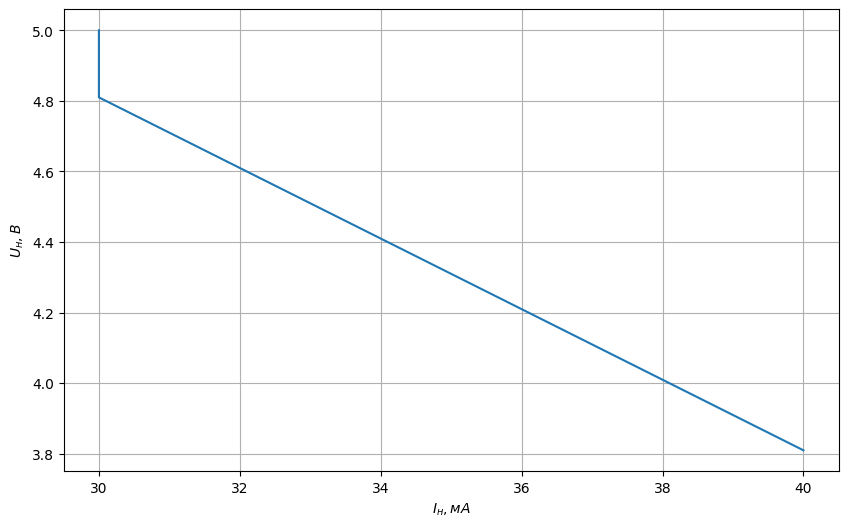

In [28]:
R_n, U_n, I_n, I_st = data_2[:, 0], data_2[:, 1], data_2[:, 2], data_2[:, 3]
R_nexp = U_n / I_n * 1000
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel(r'$I_н, мА$')
plt.ylabel(r'$U_н, В$')
plt.plot(I_n, U_n)
plt.savefig('graphs/Выходная_характеристика_2.png', dpi=300)

## Lab_4_2 Подсчёт кпд, $P_{вх}$ и $P_{н}$

In [ ]:
P_vh = (I_n + I_st) * 9.21
P_n = I_n * U_n
print("R_n\tR_nexp\tU_n\tI_n\tI_st\tP_vh\tP_n\tкпд")
for i in range(8):
    print(f"{round(float(R_n[i]), 2)}\t{np.round(R_nexp[i], 2)}\t{round(float(U_n[i]), 2)}\t{round(float(I_n[i]), 2)}\t{round(float(I_st[i]), 2)}\t{round(float(P_vh[i]), 2)}\t{round(float(P_n[i]), 2)}\t{round(float(P_n[i]) / float(P_vh[i]), 2)}")
data = {
    "$R_н$, Ом": R_n,
    "$R_{н эксп}$, Ом": R_nexp,
    r"$\Delta R_{н эксп}$, Ом": R_n - R_nexp,
    r"$\delta R_{н эксп}$, %": (R_n - R_nexp) / R_n * 100,
}
data = pd.DataFrame(data)
md_data = data.to_markdown(index=False)
Markdown(md_data)

R_n	R_nexp	U_n	I_n	I_st	P_vh	P_n	кпд
100.0	95.25	3.81	40.0	39.0	727.59	152.4	0.21
200.0	160.33	4.81	30.0	25.0	506.55	144.3	0.28
300.0	163.67	4.91	30.0	17.0	432.87	147.3	0.34
400.0	164.67	4.94	30.0	12.0	386.82	148.2	0.38
600.0	165.67	4.97	30.0	8.0	349.98	149.1	0.43
800.0	166.0	4.98	30.0	6.0	331.56	149.4	0.45
1000.0	166.0	4.98	30.0	5.0	322.35	149.4	0.46
inf	166.67	5.0	30.0	0.0	276.3	150.0	0.54


/tmp/ipykernel_17103/2707017135.py:10: RuntimeWarning: invalid value encountered in divide
  r"$\delta R_{н эксп}$, %": (R_n - R_nexp) / R_n * 100,


|   $R_н$, Ом |   $R_{н эксп}$, Ом |   $\Delta R_{н эксп}$, Ом |   $\delta R_{н эксп}$, % |
|------------:|-------------------:|--------------------------:|-------------------------:|
|         100 |             95.25  |                    4.75   |                   4.75   |
|         200 |            160.333 |                   39.6667 |                  19.8333 |
|         300 |            163.667 |                  136.333  |                  45.4444 |
|         400 |            164.667 |                  235.333  |                  58.8333 |
|         600 |            165.667 |                  434.333  |                  72.3889 |
|         800 |            166     |                  634      |                  79.25   |
|        1000 |            166     |                  834      |                  83.4    |
|         inf |            166.667 |                  inf      |                 nan      |

In [30]:
R_exit = np.round(np.max(U_n) - np.min(U_n) / (np.max(I_n) - np.min(I_n)), 2)

## Lab_4_2 Расчёт $R_{вых}$

In [31]:
R_exit = (np.max(U_n) - np.min(U_n)) / ((np.max(I_n) - np.min(I_n)) / 1000)
print(f"{R_exit=}")

R_exit=np.float64(118.99999999999999)


# Lab_5

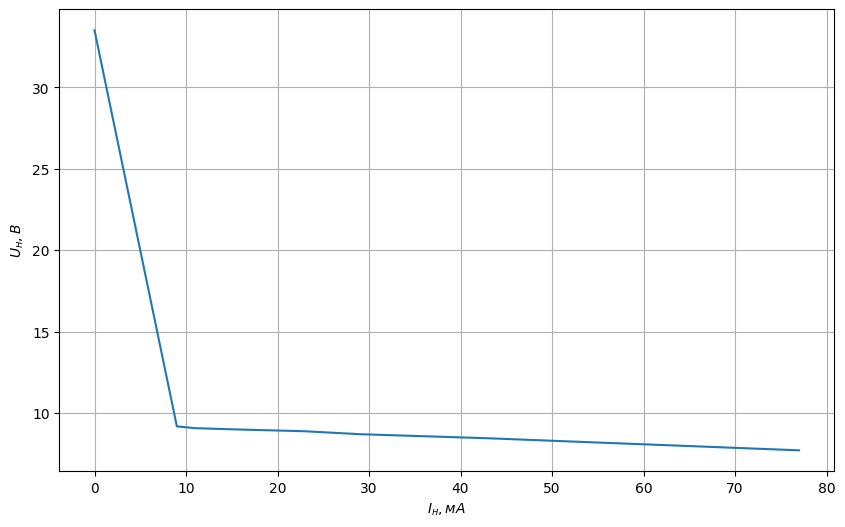

In [32]:
R_n, U_2, U_n, I_n = data_3[:, 0], data_3[:, 1], data_3[:, 2], data_3[:, 3]
U_max = 28.8
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel(r'$I_н, мА$')
plt.ylabel(r'$U_н, В$')
plt.plot(I_n, U_n)
plt.savefig('graphs/Выходная_характеристика_3.png', dpi=300)

## Расчёт $K_{п}$ Lab_5

In [33]:
for i in range(8):
    print(f"K_p[{i+1}]={np.round(U_max / U_n[i], 2)}")

K_p[1]=3.73
K_p[2]=3.4
K_p[3]=3.31
K_p[4]=3.24
K_p[5]=3.2
K_p[6]=3.17
K_p[7]=3.13
K_p[8]=0.86


# Lab_6

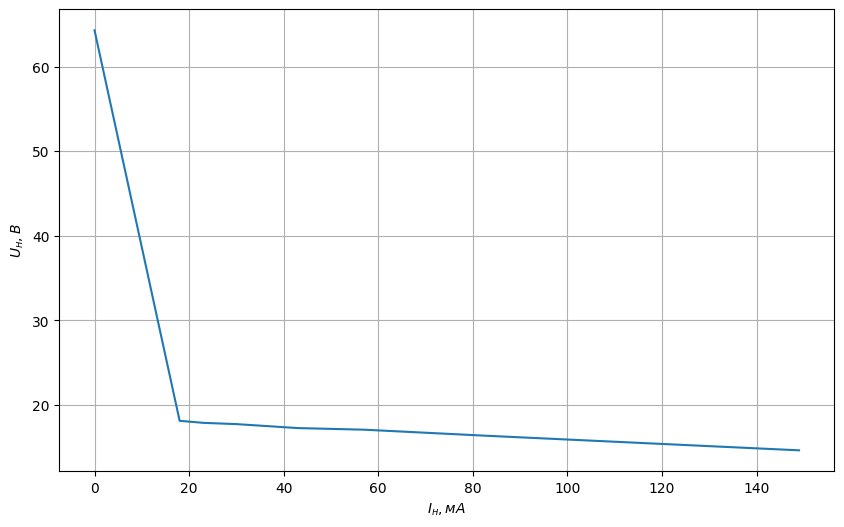

In [34]:
R_n, U_2, U_n, I_n = data_4[:, 0], data_4[:, 1], data_4[:, 2], data_4[:, 3]
U_max = 28.8
plt.figure(figsize=(10, 6))
plt.grid()
plt.xlabel(r'$I_н, мА$')
plt.ylabel(r'$U_н, В$')
plt.plot(I_n, U_n)
plt.savefig('graphs/Выходная_характеристика_4.png', dpi=300)

## Расчёт $K_{п}$ Lab_6

In [35]:
for i in range(8):
    print(f"K_p[{i+1}]={np.round(U_max / U_n[i], 2)}")

K_p[1]=1.97
K_p[2]=1.76
K_p[3]=1.69
K_p[4]=1.67
K_p[5]=1.62
K_p[6]=1.61
K_p[7]=1.59
K_p[8]=0.45
